In [1]:
# import các thư viện cần thiết
import os
import glob
import cv2
from deepface.commons import functions
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# lấy đường dẫn tuyệt đối
directory = r'C:/Users/Admin/Desktop/qa/105_classes_pins_dataset/'

# Lấy ảnh để sử dụng model
## Sử dụng khoảng 50 ảnh mỗi người

In [3]:

list_name = []
face_detect_pic = []
face_label = []
import dlib
it = 0
"""
detect các khuôn mặt trong bức ảnh sử dụng HOG - Histogram of Oriented Gradient để detect khuôn mặt.
HOG mô tả hình dạng và sự xuất hiện của một đối tượng trong ảnh
"""
hog_face_detector = dlib.get_frontal_face_detector()
directory = r'C:/Users/Admin/Desktop/qa/105_classes_pins_dataset/'
for folder_name in os.listdir(directory):
    list_name.append(folder_name)
name_index = {name:index for index,name in enumerate(list_name)}
index_name = {index:name for index,name in enumerate(list_name)}
for i in list_name:
    open_folder = directory + i
    
    j = 0
   # print(open_folder)
    
    for file in os.listdir(open_folder):
        file_name = open_folder+'/'+file
        image = cv2.imread(file_name)
        if(np.sum(image[:,:,0]) == np.sum(image[:,:,1])):# loại bỏ ảnh xám trong tập dữ liệu
            break
        
        faces_hog = hog_face_detector(image, 1)
        for face in faces_hog:
            x = face.left()
            y = face.top()
            if( x <=0 or y <= 0):
                break
            w = face.right() - x
            h = face.bottom() - y
            face_detect_pic.append(image[y:y+h,x:x+w,:])
            face_label.append(name_index[i])
        j+=1
        
            #cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
        
        
  

In [4]:
from deepface import DeepFace
face_model = DeepFace.Facenet.loadModel()

# Load model facenet. Facenet là một mạng CNN để embedding face từ một tensor M x N x 3(ảnh màu) trở thành 1 feature vector có chiều là 128

In [5]:
# các layer, tham số của mạng CNN, ở đây mạng Facenet đã được huấn luyện, ta chỉ cần cho khớp ảnh đầu vào với input = 160*160*3
face_model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

__________________________________________________________________________________________________
Block35_3_Branch_0_Conv2d_1x1_B (None, 17, 17, 32)   96          Block35_3_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block35_3_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_3_Branch_1_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_3_Branch_2_Conv2d_0c_3x (None, 17, 17, 32)   96          Block35_3_Branch_2_Conv2d_0c_3x3[
__________________________________________________________________________________________________
Block35_3_Branch_0_Conv2d_1x1_A (None, 17, 17, 32)   0           Block35_3_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block35_3_Branch_1_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_3_Branch_1_Conv2d_0b_3x3_
__________

Block17_1_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_1_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_1_Branch_0_Conv2d_1x1 ( (None, 8, 8, 128)    114688      Mixed_6a[0][0]                   
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    114688      Block17_1_Branch_1_Conv2d_0b_1x7_
__________________________________________________________________________________________________
Block17_1_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_1_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_1_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_1_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_1_

__________________________________________________________________________________________________
add_10 (Add)                    (None, 8, 8, 896)    0           Block17_4_Activation[0][0]       
                                                                 lambda_10[0][0]                  
__________________________________________________________________________________________________
Block17_5_Activation (Activatio (None, 8, 8, 896)    0           add_10[0][0]                     
__________________________________________________________________________________________________
Block17_6_Branch_6_Conv2d_0a_1x (None, 8, 8, 128)    114688      Block17_5_Activation[0][0]       
__________________________________________________________________________________________________
Block17_6_Branch_6_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_6_Branch_6_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_6_

Block17_10_Branch_10_Conv2d_0c_ (None, 8, 8, 128)    114688      Block17_10_Branch_10_Conv2d_0b_1x
__________________________________________________________________________________________________
Block17_10_Branch_0_Conv2d_1x1_ (None, 8, 8, 128)    384         Block17_10_Branch_0_Conv2d_1x1[0]
__________________________________________________________________________________________________
Block17_10_Branch_10_Conv2d_0c_ (None, 8, 8, 128)    384         Block17_10_Branch_10_Conv2d_0c_7x
__________________________________________________________________________________________________
Block17_10_Branch_0_Conv2d_1x1_ (None, 8, 8, 128)    0           Block17_10_Branch_0_Conv2d_1x1_Ba
__________________________________________________________________________________________________
Block17_10_Branch_10_Conv2d_0c_ (None, 8, 8, 128)    0           Block17_10_Branch_10_Conv2d_0c_7x
__________________________________________________________________________________________________
Block17_10

__________________________________________________________________________________________________
Block8_3_Branch_3_Conv2d_0c_3x1 (None, 3, 3, 192)    0           Block8_3_Branch_3_Conv2d_0c_3x1_B
__________________________________________________________________________________________________
Block8_3_Concatenate (Concatena (None, 3, 3, 384)    0           Block8_3_Branch_0_Conv2d_1x1_Acti
                                                                 Block8_3_Branch_3_Conv2d_0c_3x1_A
__________________________________________________________________________________________________
Block8_3_Conv2d_1x1 (Conv2D)    (None, 3, 3, 1792)   689920      Block8_3_Concatenate[0][0]       
__________________________________________________________________________________________________
lambda_18 (Lambda)              (None, 3, 3, 1792)   0           Block8_3_Conv2d_1x1[0][0]        
__________________________________________________________________________________________________
add_18 (Ad

In [6]:
# đổi màu bgr sang rgb do opencv đọc màu ngược lại 
for i in range(len(face_detect_pic)):
    face_detect_pic[i] = cv2.cvtColor(face_detect_pic[i],cv2.COLOR_RGB2BGR)

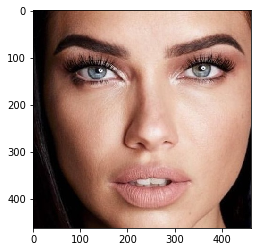

In [7]:
plt.imshow(face_detect_pic[0])

In [8]:
face_label =np.array(face_label)

In [9]:
import numpy as np

In [10]:
import time

In [11]:
start  = time.time()
face_vector_list = []
for i in face_detect_pic:
    #resize ảnh về kích thước phù hợp với đầu vào
    append_img = (cv2.resize(src = i, dsize =(160,160)))
    
    # đổi các ảnh từ BGR (do cách đọc ảnh của open cv) sang RGB
    append_img = cv2.cvtColor(append_img, cv2.COLOR_RGB2BGR)
    
    #đưa ảnh vào là tensor 1 * 160 * 160 *3
    append_img = append_img.reshape(1,160,160,3)
    
    #chuẩn hóa ảnh từ [0,255] thành các số nằm trong [0,1]
    append_img = append_img.astype(np.double)/255
    
    #dự đoán vector ảnh sau khi đi qua mạng CNN và chỉnh kích thước lại(kích thước là 128*1)
    append_img = face_model.predict(append_img)
    face_vector_list.append(append_img.reshape(128,))
end = time.time()
end-start

323.05962467193604

In [11]:
# chuẩn hóa vector để độ dài vector = 1
for i in range(len(face_vector_list)):
    face_vector_list[i] = face_vector_list[i]/np.linalg.norm(face_vector_list[i])

In [12]:
# sử dụng phương pháp support vector machine classification để dự đoán
from sklearn.svm import SVC

# chia train, test để chọn ra bộ tham số phù hợp nhất cho bộ dữ liệu
from sklearn.model_selection import train_test_split

In [13]:
face_vector_list = np.array(face_vector_list)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(face_vector_list,face_label, test_size = 0.3)

In [15]:
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test, test_size = 0.5)


In [17]:
X_train.shape

(1785, 128)

# sử dụng SVM bởi lý do n( số mẫu dữ liệu = 2551) > m(số feature = 128 )

In [21]:
# sử dụng SVM với gaussian kernel, đánh giá mô hình với các tham số C khác nhau
accuracy_val_list_svm = []
accuracy_train_list_svm = []
from sklearn.metrics import accuracy_score
for i in range(50):
    clf = SVC(kernel='rbf', C = i+1)
    clf.fit(X_train,y_train)
    predict = clf.predict(np.array(X_val))
    accuracy_val_list_svm.append(accuracy_score(predict,y_val))
    accuracy_train_list_svm.append(accuracy_score(clf.predict(X_train),y_train))
    

In [32]:
# sử dụng SVM với gaussian kernel, đánh giá mô hình với các tham số C khác nhau
accuracy_val_list_svm_rbf = []
accuracy_train_list_svm_rbf = []
from sklearn.metrics import accuracy_score
for i in range(50):
    clf = SVC(kernel='rbf', C = i+1)
    clf.fit(X_train,y_train)
    predict = clf.predict(np.array(X_val))
    accuracy_val_list_svm_rbf.append(accuracy_score(predict,y_val))
    accuracy_train_list_svm_rbf.append(accuracy_score(clf.predict(X_train),y_train))
    

In [33]:
x = np.arange(1,51,1)

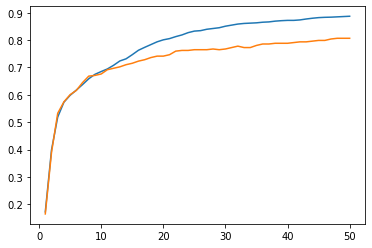

In [34]:
plt.plot(x,accuracy_train_list_svm_rbf)
plt.plot(x,accuracy_val_list_svm_rbf)

nhận xét: khi tăng C, độ chính xác của mô hình dần cải thiện, và có xu hướng bão hòa khi C càng lớn

In [37]:
accuracy_val_list_svm_linear = []
accuracy_train_list_svm_linear = []
from sklearn.metrics import accuracy_score
for i in range(50):
    clf = SVC(kernel='linear', C = i+1)
    clf.fit(X_train,y_train)
    predict = clf.predict(np.array(X_val))
    accuracy_val_list_svm_linear.append(accuracy_score(predict,y_val))
    accuracy_train_list_svm_linear.append(accuracy_score(clf.predict(X_train),y_train))

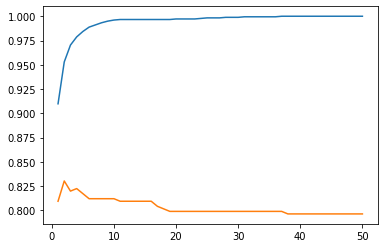

In [38]:
plt.plot(x,accuracy_train_list_svm_linear)
plt.plot(x,accuracy_val_list_svm_linear)

nhận xét: với linear kernel thì có vẻ như model không được tốt cho lắm bởi bị gặp vấn đề overfitting( tốt trên trainset nhưng tệ trên valset và testset)

In [40]:
np.where(accuracy_val_list_svm_rbf == np.max(accuracy_val_list_svm_rbf))# các vị trí accuracy cho giá trị lớn nhất

(array([47, 48, 49], dtype=int64),)

Kết luận: Ta sẽ chọn C = 50

In [42]:
#độ chính xác khi đánh giá trên tập test
clf = SVC(kernel='rbf', C = 50)
clf.fit(X_train,y_train)
test_predict = clf.predict(X_test)
accuracy_score(test_predict,y_test)

0.8485639686684073

accuracy thu được là 0.84856, là 1 kết quả khá chính xác

In [49]:
# dự đoán khuôn mặt của ai bằng phương pháp KNN
from sklearn.neighbors import KNeighborsClassifier

In [50]:
accuracy_list_train_knn = []
accuracy_list_val_knn = []

In [52]:
for i in range(50):
    neigh = KNeighborsClassifier(n_neighbors=i+1)
    neigh.fit(X_train,y_train)
    predict_knn = neigh.predict(X_val)
    accuracy_list_train_knn.append(accuracy_score(neigh.predict(X_train),y_train))
    accuracy_list_val_knn.append(accuracy_score(predict_knn,y_val))

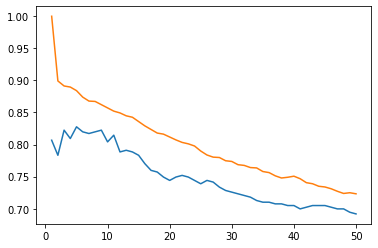

In [53]:
plt.plot(x,accuracy_list_val_knn)
plt.plot(x,accuracy_list_train_knn)

Nhận xét: KNN có vẻ nhìn chung cho accuracy cao hơn SVM, trên dưới 10 vẫn là ổn nhất, từ 10 trở đi, accuracy có xu hướng giảm dần, và càng tăng số neighbors thì model càng giảm độ chính xác

In [55]:
np.where(accuracy_list_val_knn == np.max(accuracy_list_val_knn)) # tìm max của accuracy

(array([4], dtype=int64),)

In [57]:
np.array(accuracy_list_val_knn)[[4]]

array([0.82767624])

tốt nhất ta nên chọn số lượng neighbors = 8

In [58]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train,y_train)
predict_knn = neigh.predict(X_test)
accuracy_score(predict_knn,y_test)

0.8276762402088773

độ chính xác với neighbors = 8 là 0.832 cũng khá cao, nhưng để tiện đánh giá các khuôn mặt chưa biết (unknow), và cũng như khoảng các euclid để loại bỏ các trường hợp khoảng cách quá xa thì em sẽ chọn KNN

In [294]:


from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
neigh.fit(face_vector_list)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius=1.0)

In [295]:
u,v = neigh.kneighbors(face_vector_list[1,:].reshape(1,-1))

In [296]:
u # khoảng cách các vector gần face vector nhất

array([[0.        , 0.59457251, 0.64450546, 0.64877451, 0.66063464,
        0.68517505, 0.68710073, 0.69328489]])

In [297]:
v
# các nhãn của face đó

array([[ 1, 22, 20, 16, 17,  5, 18,  0]], dtype=int64)

In [298]:
v[0]

array([ 1, 22, 20, 16, 17,  5, 18,  0], dtype=int64)

In [299]:
def face_reg(img):
    global neigh
    global face_model
    global face_vector_list
    global index_name
    global face_label
    t = 0
    s = 0
    v_save = 0
    k = 0
    faces_hog = hog_face_detector(img, 1)
    if(faces_hog == 0):
        return img
    for face in faces_hog :
        x = face.left()
        y = face.top()
        w = face.right() - x
        h = face.bottom() - y
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        vec = img[y:y+h,x:x+w]
        vec = cv2.resize(src = vec, dsize = (160,160))
        vec = vec.reshape(1,160,160,3).astype(np.double)/255
        vec = face_model.predict(vec)
        vec = vec/np.linalg.norm(vec)
        u, v = neigh.kneighbors(vec)
        v_save = v.copy()
        v = v[u < 0.85]

        if(v.shape[0] < 3):
            cv2.putText(img,'unkown',(int(x),int(y-10)),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.6,(0,0,255),1)
            t = 1
        
        else:
            unique_elements, counts_elements = np.unique(face_label[v], return_counts=True)
            #print(unique_elements.shape)
            #print(counts_elements)
            if(np.max(counts_elements) < 3 ):
                cv2.putText(img,'unkown',(int(x),int(y-10)),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.6,(0,0,255),1)
               
    
            else:
                a = np.where(counts_elements == np.max(counts_elements))
                
                cv2.putText(img,index_name[unique_elements[a[0][0]]][5:],(int(x),int(y-10)),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.6,(0,0,255),1)
                
    return img


# thử nghiệm hàm face_reg

In [302]:
face_demo1 = cv2.imread(r'C:\Users\Admin\Desktop\qa\105_classes_pins_dataset\pins_Alexandra Daddario\Alexandra Daddario4_377.jpg')
face_demo1 = cv2.cvtColor(face_demo1, cv2.COLOR_RGB2BGR)

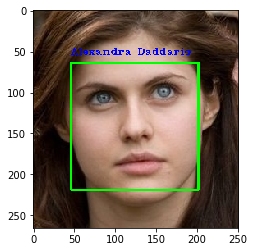

In [303]:
plt.imshow(face_reg(face_demo1))

model dự đoán hình ảnh của cô diễn viên khá chính xác

# lưu các data cần thiết để sử dụng cho app

In [304]:
import pickle

In [305]:
with open('face_vector_normalize','wb') as f:
    pickle.dump(face_vector_list,f)

In [306]:
with open('face_label','wb') as f:
    pickle.dump(face_label,f)

In [307]:
with open('face_name','wb') as f:
    pickle.dump(index_name,f)

In [308]:
with open('predict','wb') as f:
    pickle.dump(neigh,f)